$\newcommand{\ket}[1]{{\left\vert{#1}\right\rangle}}$
$\newcommand{\bra}[1]{{\left\langle{#1}\right\vert}}$
# Algoritmo VQLS

Neste notebook, vamos apresentar o algoritmo Grover e implementar em `myQLM`.

- Artigo Original do VQLS https://arxiv.org/abs/1909.05820


## Descrição do Algoritmo VQLS

Considerando $A$ uma matriz $2^n x 2^2$ que pode ser expressa como uma combinação linear de matrizes unitárias $L$, tal que $A_0$, $A_1$, ..., $A_{L-1}$, temos que:

\begin{equation}
A = \sum_{i=0}^{L-1} c_l A_l
\end{equation}

Onde $c_l$ são números complexos arbitrários. Outra observação é que para o algoritmo assumimos que $A_l$ pode ser eficientemente implementada em um circuito quântico agindo em $n$ qubits. Para o vetor b, previamente normalizado, aplicamos um operador U, gerando o estado $\ket{b}$ a partir do qubir $\ket{0}$;

\begin{equation}
U \ket{0} = \ket{b}
\end{equation}

Onde aqui assumimos que $U$ pode ser implementada eficientemente em um circuito quântico. Com isso, o intuito é encontrar o estado $\ket{x}$, tal que $\ket{x}$ é igual ou proporcional a $A^{-1}\ket{b}. Para o algoritmo, o estado desejado é:

\begin{equation}
\ket{\Psi} := \frac{A\ket{x}}{\sqrt{\bra{x}A^{\dagger}A\ket{x}}}
\end{equation}

Classicamente, a complexidade de execucão desses algoritmos é da ordem de $O (N \sqrt{k})$, sendo $k$ o número de condições da matriz A, obtido a partir da razão entre o seu maior e menor autovalor. Com o VQLS, podemos escalonar linearmente em k, logaritmicamente em 1/ε ou polilogaritmicamente em N,sendo ε a tolerˆancia a erro do algoritmo associada à função de custo. Mas, como aplicamos na prática? Vejamos primeiro um panorama do algoritmo.


## Panorâma do VQLS
De início, começamos com um registrador de qubit, com cada qubit inicializado em $\ket{0}$. O algoritmo pega suas entradas, então prepara e avalia a função de custo, começando com a criação de algum ansatz $V(w)$. Se o custo calculado for maior que algum parâmetro $\gamma$, o algoritmo é executado novamente com os parâmetros atualizados, caso contrário, o algoritmo termina e o ansatz é calculado com os parâmetros ótimos (determinados no término). Isso nos dá o vetor de estado que minimiza nossa função de custo e, portanto, a forma normalizada de $\ket{x}$. A representação geral do algoritmo pode ser vizualizada abaixo:

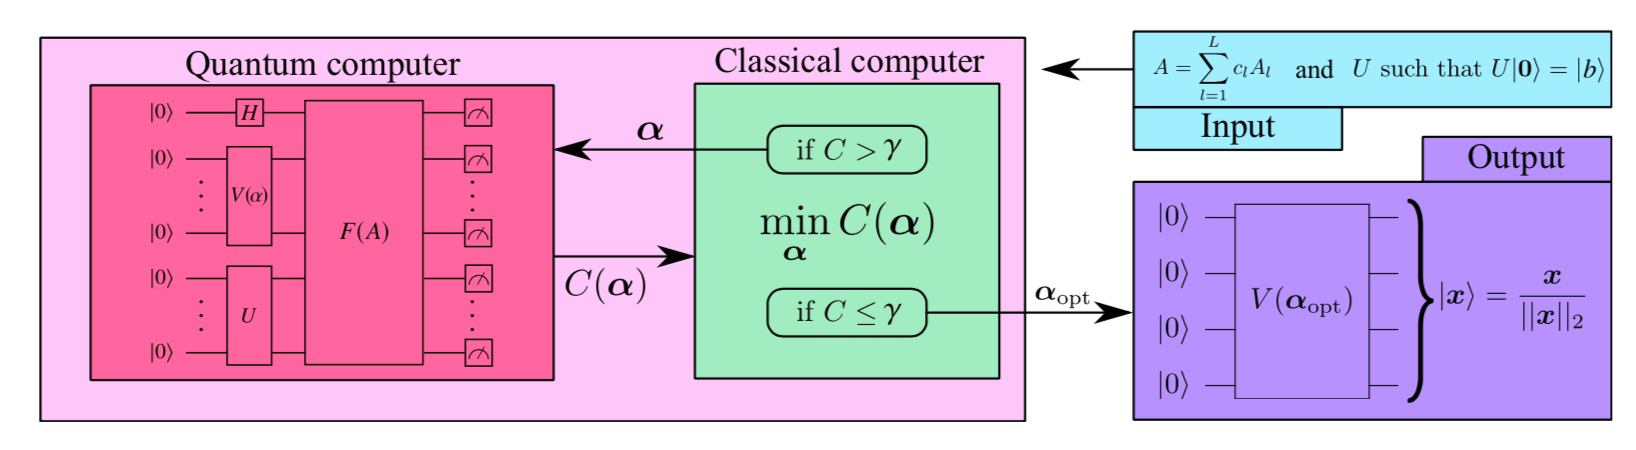

O circuito quântico pode ser vizualizado abaixo:

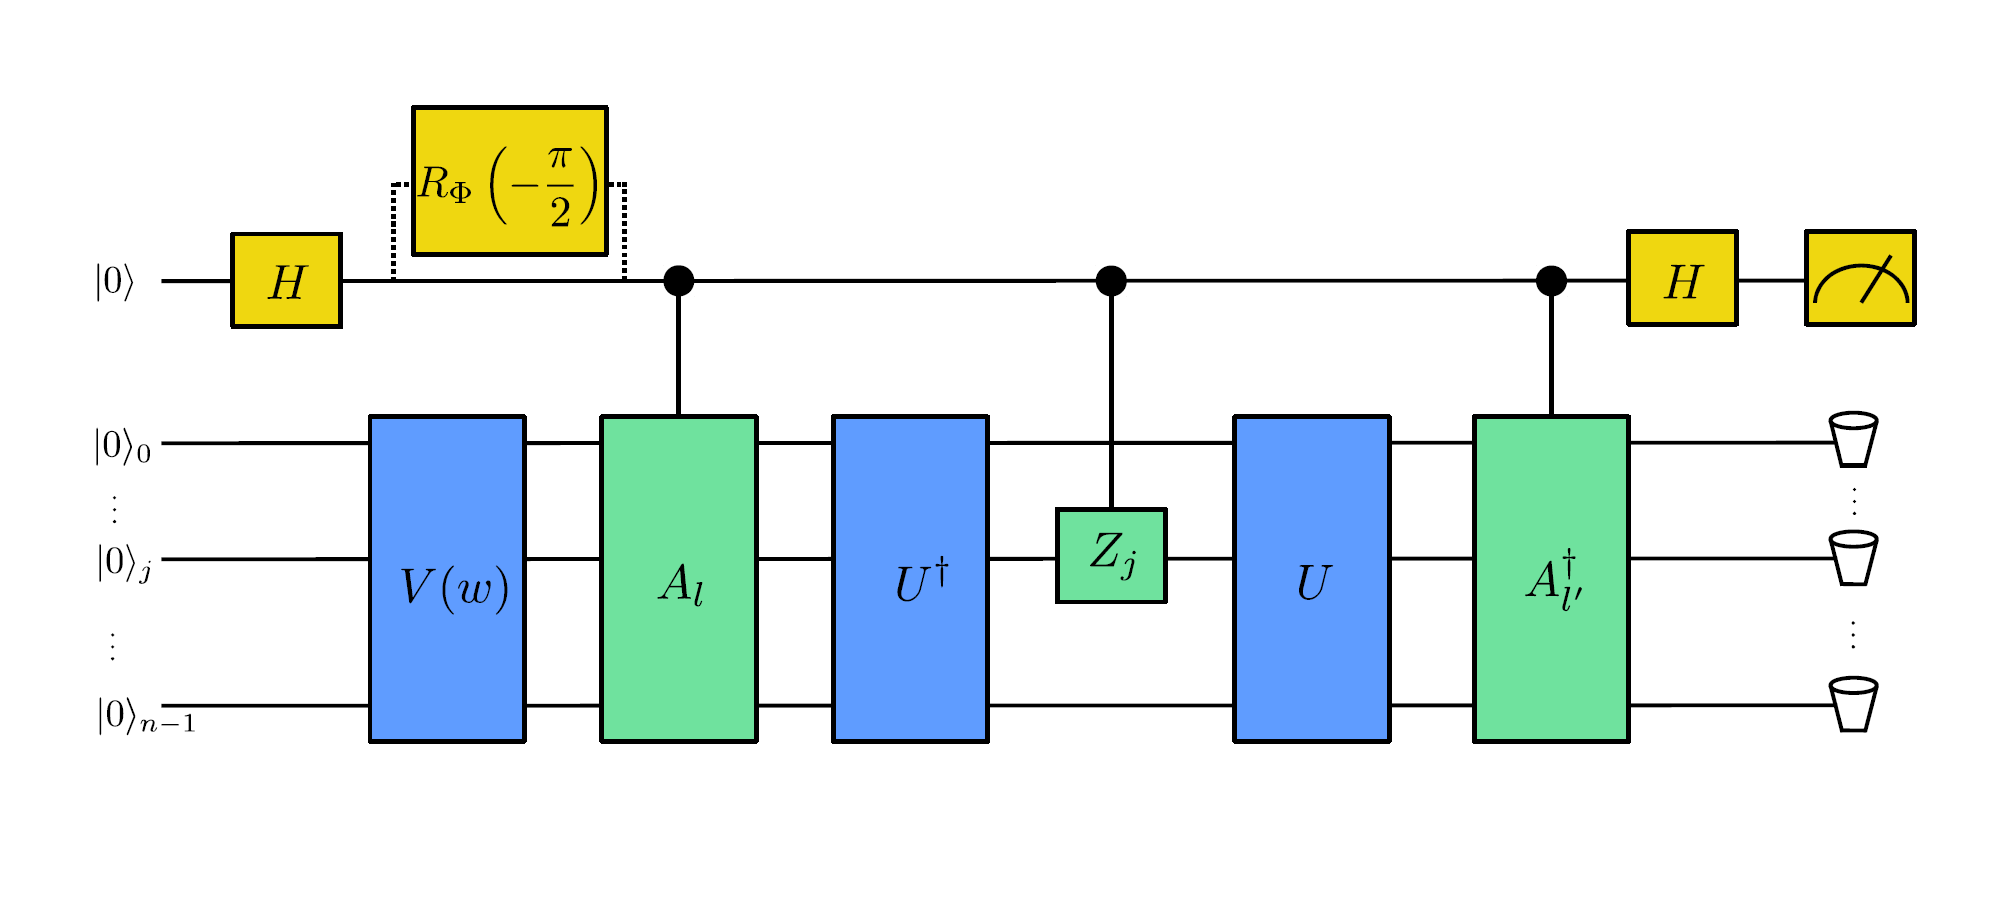

## Os passos do algoritmo

O algoritmo tem os seguintes passos:

1. Primeiro, preparar o estado inicial $\ket{b} = U \ket{0}$;

2. Aplicar aplicar uma função de custo para encontrar parâmetros $w$ que possibilitem o cálculo de $\ket{x}$ normalizado;

3. Verificar, classicamente, se o custo é maior que um parâmetros $gamma$ para repetir a repetição do algoritmo;

4. Interrupção da execução do algoritmo ao encontrar um parâmetro ótimo $w_{opt}$

## A função de custo

Os parâmetros devem ser otimizados para maximizar a sobreposição entre os estados quânticos $\ket{b}$ e $\ket{\Psi}$. Isso sugere definir a seguinte função de custo:

\begin{equation} 
C_{G} = 1 - \vert \langle b \vert \Psi \rangle \vert^2, 
\end{equation}

De modo que a sua minnimização deve levar à solução do problema. A principal ideia do algoritmo é substituir o termo ${\color{blue}{\ket{0}\bra{0}}}$ na função de custo original:

\begin{equation} 
C_{G} = 1 - \frac{\sum_{l, l'} c_l c_{l'}^{*} \bra{0} V^{\dagger} A_{l'}^{\dagger}U {\color{blue}{\ket{0} \bra{0} U^{\dagger} A_l V \ket{0}}}}{\sum_{l, l'} c_l c_{l'}^{*} \bra{0} V^{\dagger} A_{l'}^{\dagger}A_l V \ket{0}}, 
\end{equation}

Pelo seguinte operador:

\begin{equation} 
{\color{blue}{P = \frac{1}{2} + \frac{1}{2n} \sum_{j = 0}^{n-1} Z_j}}, 
\end{equation}

Tal que $Z_j$ é a porta Z aplicada no qubit $j$. Tendo como função de custo:

\begin{equation} 
C_{L} = 1 - \frac{\sum_{l, l'} c_l c_{l'}^{*} \bra{0} V^{\dagger} A_{l'}^{\dagger}U {\color{blue}{P U^{\dagger} A_l V \ket{0}}}}{\sum_{l, l'} c_l c_{l'}^{*} \bra{0} V^{\dagger} A_{l'}^{\dagger}A_l V \ket{0}}, 
\end{equation}

que pode ser aplicado em um ciruito quântico, sendo uma boa aproximação para $CG$, uma vez que:

\begin{equation}
C_G \rightarrow 0 \Leftrightarrow C_L \rightarrow 0
\end{equation}

Substituindo o operador $P$ na equação, temos então:

\begin{equation} 
C_{L} = \frac{1}{2} - \frac{1}{2n} \frac{\sum_{j = 0}^{n-1} \sum_{l, l'} c_l c_{l'}^{*} \mu_{l, l', j}}{\sum_{l, l'} c_l c_{l'}^{*} \mu_{l, l', -1}}, 
\end{equation}

Que pode ser calculado sempre que for possível medir o coeficiente:

\begin{equation} 
\mu_{l, l', j} = \bra{0} \vert V^{\dagger} A_{l'}^{\dagger} U Z_j U^{\dagger} A_l V \ket{0}, 
\end{equation}

## Implementação do Algoritmo

Para o exemplo de aplicação, iremos utilizar o seguinte sistema:

\begin{equation}
Ax = b
\end{equation}

\begin{equation} \begin{pmatrix}
1 && 0 && 0 && 0 && 0.4 && 0 && 0 && 0 \\
0 && 1 && 0 && 0 && 0 && 0.4 && 0 && 0 \\
0 && 0 && 1 && 0 && 0 && 0 && 0 && 0 \\
0 && 0 && 0 && 1 && 0 && 0 && 0 && 0 \\
0.4 && 0 && 0 && 0 && 1 && 0 && 0 && 0 \\
0 && 0.4 && 0 && 0 && 0 && 1 && 0 && 0 \\
0 && 0 && 0 && 0 && 0 && 0 && 1 && 0 \\
0 && 0 && 0 && 0 && 0 && 0 && 0 && 1 
\end{pmatrix}\begin{pmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5 \\
x_6 \\
x_7 \\
x_8 
\end{pmatrix} = \begin{pmatrix}
0.35355339 \\
0.35355339 \\
0.35355339 \\
0.35355339 \\
0.35355339 \\
0.35355339 \\
0.35355339 \\
0.35355339 
\end{pmatrix} \end{equation}

Nesse exemplo, podemos decompor a matriz $A$ como uma combinação linear de matrizes unitárias a partir de portas Pauli:

\begin{equation} A = c_0A_0 + c_1 A_1 + c_2 A_2 = I + 0.2X_0 Z_1 + 0.2 X_0 \end{equation}

E o vetor $\ket{b}$: 

\begin{equation} 
\ket{b} = U \ket{0} = H_0 H_1 H_2 \ket{0},
\end{equation}

Este problema é computacionalmente bastante fácil, pois uma única camada de rotações locais é suficiente para gerar o estado da solução, ou seja, podemos usar o seguinte ansatz:

\begin{equation}
\ket {x} = V(w) \ket{0} = [R_y(w_0) R_y(w_1) R_Y(w_2)]H_0 H_1 H_2 \ket{0}
\end{equation}

Mas, como implementamos isso no código? Inicialmente é feita a importação das bibliotecas necessárias.

In [1]:
import time
import numpy as np
import importlib.util
from scipy.optimize import minimize

from qat.lang.AQASM import Program,QRoutine,RY,RZ,H,CNOT,Z,PH
from qat.core import Observable, Term
from qat.plugins import ObservableSplitter
from qat.qpus import get_default_qpu

Em seguida, definimos a função clássica responsável por realizar a minimização da função de custo no passo 3 do algoritmo. Essa função implementa um `Timer`, que será "chamado" na função de custo. Além disso, também definimos o observável `qpu`, que será implementado ao longo do algoritmona função de custo.

In [2]:
class Timer():
    text: str = "Elapsed time: {:0.4f} seconds"
    _start_time: float = 0

    def start(self) -> None:
        """Start a new timer"""        
        self._start_time = time.perf_counter()

    def stop(self) -> float:
        """Stop the timer, and report the elapsed time"""
        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None

        return elapsed_time
    
    def __enter__(self):
        """Start a new timer as a context manager"""
        self.start()
        return self

    def __exit__(self, *exc_info):
        """Stop the context manager timer"""
        print(self.text.format(self.stop()))
        
qpu = ObservableSplitter() | get_default_qpu()

A fução `U_b` define a preparação do estado $\ket{b}$:  

\begin{equation} 
\ket{b} = U \ket{0} = H_0 H_1 H_2 \ket{0},
\end{equation}

Além disso, as matrizes $H, X, Z$ e a função `apply_n` são criadas para serem utilizadas na geração de observáveis posteriormente.

In [3]:
def U_b(qprog,qubits,n_qubits):
    for idx in range(n_qubits):
        qprog.apply(H,qubits[idx])

H_mat = np.array([[1,1],[1,-1]])/np.sqrt(2)
X_m = np.array([[0,1],[1,0]])
Z_m = np.array([[1,0],[0,-1]])

def apply_n(f, m, n):
    r = m
    for i in range(n-1):
        r = f(r,m)
    return r

Segue abaixo o circuito variacional para mapeamento do estado $\ket{0}$  para o estado $\ket{x}$ a partir de um ansatz. 

In [4]:
def variational_block(qprog,qubits,n_qubits,weights):
    
    # Preparação da Sobreposição.
    for idx in range(n_qubits):
        qprog.apply(H,qubits[idx])

    # Circuito de Variação
    for idx, element in enumerate(weights):
        var = qprog.new_var(float, '\\theta'+str(idx))
        qprog.apply(RY(var), qubits[idx])

Segue abaixo a função de normalização do $\ket{\Psi}$ e a função de custo. 

In [5]:
def psi_norm(c):
    """Returns the normalization constant <psi|psi>, where |psi> = A |x>."""

    return abs(qpu.submit(c.to_job(job_type='OBS', observable=A*A)).value)

def bind(c, w):
    #print({'\\theta'+str(idx):e for idx, e in enumerate(w)})
    return c.bind_variables({'\\theta'+str(idx):e for idx, e in enumerate(w)})

# Valor esperado do Observável e função de custo correspondente
def cost_loc(weights: np.array,
             O:       Observable
            )->float:
    c = bind(parametrized_circuit, weights)
    num = qpu.submit(c.to_job(job_type='OBS', observable=O, nbshots=0)).value
    res = 0.5 - 0.5 * abs(num) / (n_qubits * psi_norm(c))
    cost_history.append(res)
    return res

Definidas as funções a serem utilizadas, abaixo são criados o observável a partir das matrizes definidas anteriormente. Por definição, esse observável (O) dá uma aceleração de $~4x$ no algoritmo. 

In [6]:
n_qubits = 3       # Número de qubits no sistema.
n_shots = 10 ** 2  # Número de medidas.
steps = 30         # Número de passos para otimização
eta = 0.8          # Learning rate
q_delta = 0.001    # Initial spread of random quantum weights
rng_seed = 0       # Seed for random number generator

np.random.seed(rng_seed)
w0 = np.random.randn(n_qubits) * q_delta 

# Definindo os Observáveis
A = Observable(n_qubits, pauli_terms=[Term(0.2, "XZ", [0,1]),Term(0.2, "X", [0])], constant_coeff=1)
U = Observable(n_qubits, matrix=apply_n(np.kron, H_mat, 3)/(2**(3-1)))
Z = Observable(n_qubits, pauli_terms=[Term(1, "Z", [i]) for i in range(n_qubits)])

O=A*U*Z*U*A

Portanto, é possível implementar o programa principal, com o passo-a-passo descrito anteriormente.

In [7]:
qprog=Program()
qubits=qprog.qalloc(n_qubits)
variational_block(qprog,qubits,n_qubits,w0)
parametrized_circuit = qprog.to_circ()
cost_history = []
with Timer():
    w = minimize(cost_loc,w0,O, method='COBYLA',
                           constraints=(), tol=0.0001, callback=None, 
                           options={'rhobeg': 1.0, 'maxiter': 50, 'disp': True, 'catol': 0.001})

# Preparação da Solução pelo VQLS
# ------------------------------------
# Dados os parâmetros de variação ``w`` que otimizamos anteriormente,
# podemos gerar o estado quântico |x>. Ao medir |x>
# na base computacional podemos estimar a probabilidade de cada estado da base.
# Para estimar a distribuição de probabilidade sobre os estados de base, 
# primeiro pegamos amostras ``n_shots`` e então calculamos a frequência relativa de cada resultado.

def prob_dist(r):
    n = 2**len(r.raw_data[0].state.bitstring)
    p = np.zeros(n)
    for j, e in enumerate(r.raw_data):
        p[sum([int(s)*2**int(i) for i,s in enumerate(e.state.bitstring)])] = e.probability
        
    return p

q_probs = prob_dist(qpu.submit(bind(parametrized_circuit,w.x).to_job()))
q_probs_init = prob_dist(qpu.submit(bind(parametrized_circuit,w0).to_job()))

# As probabilidades anteriores devem corresponder às seguintes probabilidades de estado quântico.

print("VQLS result")
print("|<x|n>|^2=\n", q_probs)


   Return from subroutine COBYLA because the MAXFUN limit has been reached.

Elapsed time: 14.1780 seconds
   NFVALS =   50   F = 4.687500E-01    MAXCV = 0.000000E+00
   X = 4.463379E-05   3.303840E-01  -8.043914E-05
VQLS result
|<x|n>|^2=
 [0.08445223 0.08445977 0.16555672 0.1655715  0.08443865 0.08444618
 0.16553009 0.16554486]


Segue abaixo a implementação do algoritmo clássico para comparação com os resultados do VQLS. 

In [8]:
# Para resolver o problema de maneira clássica, usamos a representação matricial explícita em
# termos de NumPy arrays.c = np.array([1.0, 0.2, 0.2])
c = np.array([1.0, 0.2, 0.2])
Id = np.identity(2)
Z_mat = np.array([[1, 0], [0, -1]])
X_mat = np.array([[0, 1], [1, 0]])

A_0 = np.identity(8)
A_1 = np.kron(np.kron(X_mat, Z_mat), Id)
A_2 = np.kron(np.kron(X_mat, Id), Id)

A_num = c[0] * A_0 + c[1] * A_1 + c[2] * A_2
b = np.ones(8) / np.sqrt(8)

# We can print the explicit values of  𝐴  and  𝑏 :
print("A = \n", A_num)
print("b = \n", b)

# The solution can be computed via a matrix inversion:
A_inv = np.linalg.inv(A_num)
x = np.dot(A_inv, b)

# Finally, in order to compare x with the quantum state $|x\rangle$, we normalize
# and square its elements.
c_probs = (x / np.linalg.norm(x)) ** 2

# Comparison
# Let us print the classical result.
print("classical result")
print("x_n^2 =\n", c_probs)

A = 
 [[1.  0.  0.  0.  0.4 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.4 0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.4 0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.4 0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1. ]]
b = 
 [0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
 0.35355339 0.35355339]
classical result
x_n^2 =
 [0.08445946 0.08445946 0.16554054 0.16554054 0.08445946 0.08445946
 0.16554054 0.16554054]
